In [66]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import os
#import pylab
#pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [67]:
dataDir='..'
dataType='val2017'
annFile='D:/Img_Repo/Debug/Annotations.json'

In [68]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [69]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
WPW1 WPW2 WPW3 WPW4 WPW5 WPW6 WPW7 WPW8 WPW9 WPW10

COCO supercategories: 
PERSONAL_WASH


In [78]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['WPW7','WPW4']);
imgIds = coco.getImgIds(catIds=catIds )
print(imgIds)
imgIds = coco.getImgIds(imgIds = imgIds)
print(imgIds)
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
print('Image Id: {}, FileName: {}'.format(img["id"],img['path']))

[0, 1, 3, 4]
[0, 1, 3, 4]
Image Id: 0, FileName: /home/rahdas/dataset/Train/Synthetic_56637_0_0.jpg


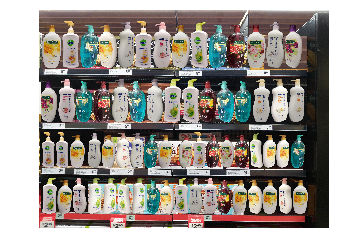

In [79]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
if os.path.exists('D:\Img_Repo\Debug\Synthetic_56637_0_0.jpg'):
    I = io.imread('D:\Img_Repo\Debug\Synthetic_56637_0_0.jpg')
    plt.axis('off')
    plt.imshow(I)
    plt.show()
else:
    print("{} not found".format(img['path']))

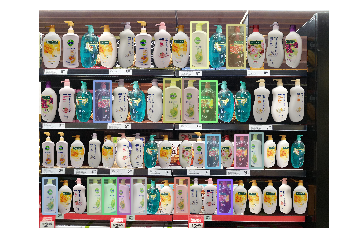

In [80]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)